In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [21]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [22]:
X_train_full.shape

(60000, 28, 28)

In [23]:
X_train_full.dtype

dtype('uint8')

In [24]:
np.set_printoptions(linewidth=1000)

In [25]:
y_train_full[0]  # 5

5

In [26]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [27]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [28]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [29]:
X_test = X_test / 255.

In [30]:
y_train[0]  # 7

7

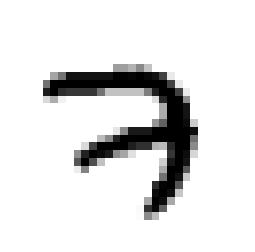

In [33]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [34]:
X_valid.shape

(5000, 28, 28)

In [35]:
X_test.shape

(10000, 28, 28)

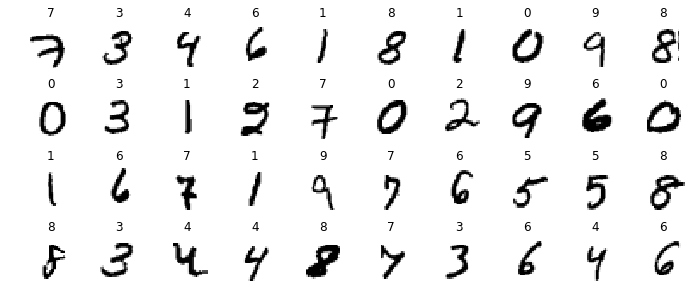

In [39]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):  # 0, 1, 2, 3
    for col in range(n_cols):  # 0, 1, 2, 3. 4, 5, 6, 7, 8, 9
        index = n_cols * row + col  # 10 * 0 + 0
        plt.subplot(n_rows, n_cols, index + 1)  # 4, 10, 1
        plt.imshow(X_train[index], cmap='binary')
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    